In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('지이인짜최종리뷰데이터.csv')

In [2]:
df.head()

,관광지,전체내용
0,경복궁,대한민국의 역사 : 대한민국의 역사가 잠들어 있는 곳. 서울을 방문했다면 꼭 방문해...
1,경복궁,국민이 공감하는 장소 : 경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에 자주 가...
2,경복궁,산책하기 좋은 경복궁 : 날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해...
3,경복궁,Good : Goooooood 다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고...
4,경복궁,가족단위로 방문하기 좋은곳 : 요새 더더욱 코로나로 인해 사람 방문이 적음. 두자녀...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관광지     5236 non-null   object
 1   전체내용    5236 non-null   object
dtypes: object(2)
memory usage: 81.9+ KB


In [4]:
import re
only_kor=re.compile('[^ ㄱ-ㅣ가-힣+]')
for i in range(len(df)):
    df.전체내용[i]=only_kor.sub('',df.전체내용[i])

In [5]:
df

,관광지,전체내용
0,경복궁,대한민국의 역사 대한민국의 역사가 잠들어 있는 곳 서울을 방문했다면 꼭 방문해야 ...
1,경복궁,국민이 공감하는 장소 경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에 자주 가족...
2,경복궁,산책하기 좋은 경복궁 날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해지...
3,경복궁,다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고 먹을거리도많네요 서울올때...
4,경복궁,가족단위로 방문하기 좋은곳 요새 더더욱 코로나로 인해 사람 방문이 적음 두자녀 동...
...,...,...
5231,"벌교 홍교, 대한다원",저는 녹차밭을 별로 기대하고 가지 않았습니다 처음에는 안 들리고 지나가려고 했었는데...
5232,"벌교 홍교, 대한다원",보성 녹차밭
5233,"벌교 홍교, 대한다원",참 멋지고 이쁘네요말로만듣고 이번에 가봤는데 좋았어요또 가보고싶었고요추천해요혼자갔는...
5234,"벌교 홍교, 대한다원",비오는 겨울 풍경도 아름다운 다원


In [6]:
df2=pd.read_csv('진짜최종 데이터.csv')
df2.dropna(axis=1,inplace=True)
df2.head()

,여행지,주소,행정구역,시군구,분류,트립어드바이저평점,카테고리,최종긍정,최종부정
0,63스퀘어,"영등포구 63로 50, 서울",서울시,영등포구,건축물,4,랜드마크,0.792686,0.207314
1,BIFF 광장,"중구 남포동, 부산",부산광역시,중구,즐길거리 & 랜드마크,4,랜드마크,0.544369,0.455631
2,SEA LIFE 부산아쿠아리움,"해운대구 해운대해변로 266, 부산",부산광역시,해운대구,수족관,4,랜드마크,0.714060,0.285940
3,가야산 국립공원,경남 합천군 가야면,경상남도,합천군,국립공원,4.5,공원,0.897052,0.102948
4,간월재,"울주군 상북면, 울산",울산광역시,울주군,산림,4.5,산,0.802439,0.197561


In [7]:
df2=df2[['여행지','카테고리']]
df2.head()

,여행지,카테고리
0,63스퀘어,랜드마크
1,BIFF 광장,랜드마크
2,SEA LIFE 부산아쿠아리움,랜드마크
3,가야산 국립공원,공원
4,간월재,산


# 전체 리뷰 워드클라우드

In [9]:
import numpy as np
import matplotlib.pyplot as plt # 시각화 패키지
# 데이터 전처리
from konlpy.tag import Okt
from collections import Counter

In [10]:
okt=Okt() # 형태소 분석기
word_list=[]
word_list=df['전체내용']

In [11]:
sentences_tag=[]

for sentence in word_list:
    morph=okt.pos(sentence)
    sentences_tag.append(morph)

In [12]:
sentences_tag

[[('대한민국', 'Noun'),
  ('의', 'Josa'),
  ('역사', 'Noun'),
  ('대한민국', 'Noun'),
  ('의', 'Josa'),
  ('역사', 'Noun'),
  ('가', 'Josa'),
  ('잠들어', 'Verb'),
  ('있는', 'Adjective'),
  ('곳', 'Noun'),
  ('서울', 'Noun'),
  ('을', 'Josa'),
  ('방문', 'Noun'),
  ('했다면', 'Verb'),
  ('꼭', 'Noun'),
  ('방문', 'Noun'),
  ('해야', 'Verb'),
  ('되는', 'Verb'),
  ('곳', 'Noun'),
  ('경복궁', 'Noun'),
  ('은', 'Josa'),
  ('우리', 'Noun'),
  ('의', 'Josa'),
  ('역사', 'Noun'),
  ('다', 'Josa'),
  ('넓은', 'Adjective'),
  ('경복궁', 'Noun'),
  ('을', 'Josa'),
  ('산책', 'Noun'),
  ('할', 'Verb'),
  ('수', 'Noun'),
  ('있는', 'Adjective'),
  ('것', 'Noun'),
  ('은', 'Josa'),
  ('언제나', 'Adverb'),
  ('행복', 'Noun'),
  ('이다', 'Josa')],
 [('국민', 'Noun'),
  ('이', 'Josa'),
  ('공감', 'Noun'),
  ('하는', 'Verb'),
  ('장소', 'Noun'),
  ('경복궁', 'Noun'),
  ('은', 'Josa'),
  ('국민', 'Noun'),
  ('들', 'Suffix'),
  ('이', 'Josa'),
  ('자주', 'Noun'),
  ('찾는', 'Verb'),
  ('곳', 'Noun'),
  ('으로', 'Josa'),
  ('작성자', 'Noun'),
  ('는', 'Josa'),
  ('주말', 'Noun'),
  ('에', 'Josa'),
 

In [13]:
noun_list=[]
for sentence in sentences_tag:
    for word,tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [14]:
len(noun_list)

noun_list=[n for n in noun_list if len(n) > 1]
noun_list[:100]

['대한민국',
 '역사',
 '대한민국',
 '역사',
 '서울',
 '방문',
 '방문',
 '경복궁',
 '우리',
 '역사',
 '경복궁',
 '산책',
 '행복',
 '국민',
 '공감',
 '장소',
 '경복궁',
 '국민',
 '자주',
 '작성자',
 '주말',
 '자주',
 '가족',
 '방문',
 '가족',
 '방문',
 '고궁',
 '공기',
 '역사',
 '체험',
 '힐링',
 '곳임',
 '산책',
 '경복궁',
 '날씨',
 '종종',
 '산책',
 '경복궁',
 '마음',
 '해지',
 '기분',
 '가을',
 '산책',
 '추천',
 '다음',
 '근처',
 '관광지',
 '거리',
 '자주',
 '이용',
 '가족',
 '위로',
 '방문',
 '요새',
 '더욱',
 '코로나',
 '사람',
 '방문',
 '자녀',
 '반시',
 '성인',
 '입장',
 '무료',
 '지금',
 '시기',
 '나들이',
 '지하철',
 '광화문역',
 '종각역',
 '이용',
 '편리',
 '하늘',
 '조선',
 '개국',
 '처음',
 '세운',
 '으뜸',
 '궁궐',
 '하늘',
 '경복궁',
 '웅장',
 '경복궁',
 '임진왜란',
 '일제강점기',
 '일본',
 '파괴',
 '당한',
 '악연',
 '향원정',
 '보수',
 '공사',
 '경회루',
 '경복궁',
 '한국',
 '건축물',
 '한복',
 '입장료',
 '무료',
 '주변',
 '한복']

In [15]:
counts=Counter(noun_list)
tags=counts.most_common(70)
tags

[('방문', 1219),
 ('아이', 799),
 ('박물관', 789),
 ('산책', 762),
 ('시간', 676),
 ('사람', 650),
 ('생각', 650),
 ('공원', 604),
 ('역사', 564),
 ('추천', 560),
 ('정말', 550),
 ('가족', 500),
 ('바다', 489),
 ('사진', 453),
 ('장소', 421),
 ('정도', 404),
 ('한번', 395),
 ('코스', 391),
 ('입장료', 370),
 ('사찰', 357),
 ('구경', 355),
 ('체험', 347),
 ('주변', 347),
 ('여행', 335),
 ('가을', 333),
 ('가면', 327),
 ('느낌', 320),
 ('위치', 319),
 ('풍경', 305),
 ('한국', 301),
 ('조금', 301),
 ('마을', 289),
 ('근처', 288),
 ('전시', 282),
 ('주차장', 282),
 ('서울', 280),
 ('모습', 275),
 ('건물', 270),
 ('경치', 262),
 ('아주', 255),
 ('보고', 249),
 ('여름', 241),
 ('매우', 239),
 ('하나', 237),
 ('주차', 236),
 ('입구', 236),
 ('다른', 234),
 ('가장', 232),
 ('길이', 230),
 ('무료', 229),
 ('거리', 225),
 ('겨울', 224),
 ('규모', 222),
 ('가기', 212),
 ('볼거리', 210),
 ('타고', 206),
 ('계곡', 206),
 ('바로', 204),
 ('바람', 204),
 ('자연', 203),
 ('날씨', 199),
 ('나무', 199),
 ('우리', 198),
 ('마음', 197),
 ('최고', 197),
 ('이용', 195),
 ('그냥', 192),
 ('단풍', 191),
 ('힐링', 183),
 ('관람', 183)]

In [16]:
tags.remove(('방문', 1219))
tags.remove(('정도', 404))
tags.remove(('한국', 301))
tags.remove(('아주', 255))
tags.remove(('매우', 239))
tags.remove(('다른', 234))
tags.remove(('가장', 232))

In [17]:
from PIL import Image
image=Image.open('cloud_img.jpg')
mask=np.array(image)

In [18]:
## 워드 클라우드 생성
font_path='C:/Windows/Fonts/HMFMOLD.ttf'
from wordcloud import WordCloud
wordcloud=WordCloud(font_path=font_path,
                   background_color='Black',width=900,height=700,colormap='spring',mask=mask)

print(dict(tags))

{'아이': 799, '박물관': 789, '산책': 762, '시간': 676, '사람': 650, '생각': 650, '공원': 604, '역사': 564, '추천': 560, '정말': 550, '가족': 500, '바다': 489, '사진': 453, '장소': 421, '한번': 395, '코스': 391, '입장료': 370, '사찰': 357, '구경': 355, '체험': 347, '주변': 347, '여행': 335, '가을': 333, '가면': 327, '느낌': 320, '위치': 319, '풍경': 305, '조금': 301, '마을': 289, '근처': 288, '전시': 282, '주차장': 282, '서울': 280, '모습': 275, '건물': 270, '경치': 262, '보고': 249, '여름': 241, '하나': 237, '주차': 236, '입구': 236, '길이': 230, '무료': 229, '거리': 225, '겨울': 224, '규모': 222, '가기': 212, '볼거리': 210, '타고': 206, '계곡': 206, '바로': 204, '바람': 204, '자연': 203, '날씨': 199, '나무': 199, '우리': 198, '마음': 197, '최고': 197, '이용': 195, '그냥': 192, '단풍': 191, '힐링': 183, '관람': 183}


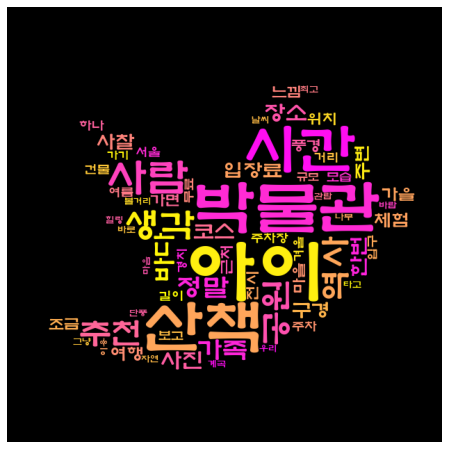

In [19]:
cloud=wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [22]:
df2['카테고리'].unique()

array(['랜드마크', '공원', '산', '역사적인 장소', '종교적인 장소', '박물관', '자연 경관', '지층',
       '해변', '행사', '섬', '리조트'], dtype=object)

In [23]:
# 랜드마크 : landmarks
df_a=df2[df2['카테고리']=='랜드마크']
df_a['여행지'].unique()

array(['63스퀘어', 'BIFF 광장', 'SEA LIFE 부산아쿠아리움', '간절곶', '강촌', '강화 풍물시장',
       '거북선모형관', '경천대', '고추장마을', '광안대교', '광한루원', '구암리 지석묘 무리', '구인사',
       '그림이 있는 정원', '금강 철새조망대', '기장시장', '김녕 미로공원', '나주 영상테마파크',
       '낙동강 옛 철교', '낙동강하구에코센터', '남대문시장', '남사 예담촌', '남사당 전수관', '남산과 N서울타워',
       '누리마루 APEC 하우스', '다랭이마을', '대관령 삼양목장', '대기리 고랭지 채소밭',
       '대한민국 국회의사당과 헌정기념관', '덕구온천 스파월드', '독락당', '동대문디자인플라자', '동대문시장',
       '두륜산 케이블카', '땅끝마을', '롯데월드', '명동', '문경 철로 자전거', '문경 활공랜드', '문장대',
       '밀양 얼음골', '바람의 언덕', '벌교 홍교, 대한다원', '별마로천문대', '보림사', '보수동 책방골목',
       '봉화의 약수', '부산타워', '부안 영상테마파크', '북촌한옥마을', '산수유마을', '삼강주막', '삼청동길',
       '서대문형무소', '서울 약령시장', '서울광장', '선비촌', '설악 씨네라마', '섬진강 기차마을', '세리월드',
       '세병관', '소래포구', '소설  『토지』 촬영장(최 참판 댁)', '소인국 테마파크', '속초 등대전망대',
       '송천 떡마을', '순천 드라마세트장 ', '신선대', '아바이마을', '아인스월드', '안민도로', '안흥찐빵마을',
       '애기봉전망대', '양떼목장', '에버랜드', '영금정', '오두산 통일전망대', '오설록뮤지엄', '올림픽공원',
       '외도 해상농원', '외암민속마을', '원당 허브랜드', '이화벽화마을', '익산 왕궁리 오층석탑', '인사동길',
       '임실치즈

In [24]:
type(list(df_a['여행지'].unique()))

list

In [25]:
landmarks=list(df_a['여행지'].unique())

In [26]:
df2['카테고리'].unique()

array(['랜드마크', '공원', '산', '역사적인 장소', '종교적인 장소', '박물관', '자연 경관', '지층',
       '해변', '행사', '섬', '리조트'], dtype=object)

In [27]:
# 공원 : parks
df_b=df2[df2['카테고리']=='공원']
parks=list(df_b['여행지'].unique())

In [28]:
parks

['가야산 국립공원',
 '강천산',
 '거제 포로수용소 유적공원',
 '경기도립 물향기수목원',
 '경상남도수목원',
 '경안천 습지생태공원',
 '계룡산 국립공원',
 '곰소염전',
 '국립수목원',
 '금강 공원',
 '금오산',
 '낙산공원',
 '내장산 국립공원',
 '달아공원',
 '대나무골 테마공원',
 '대왕암 공원',
 '덕유산 국립공원',
 '덕진공원',
 '돌산대교와 돌산공원',
 '무주 구천동계곡 방화동 가족휴양촌,',
 '문경새재도립공원',
 '민주공원',
 '북촌 돌하르방공원',
 '비자림',
 '사직단',
 '삼사 해상공원',
 '상족암군립공원',
 '서울대공원',
 '서일농원',
 '선유도',
 '선유도공원',
 '설악산 국립공원',
 '속리산 국립공원',
 '순천만 갈대밭',
 '아차산북한산국립공원',
 '아침고요수목원',
 '안양 예술공원',
 '여미지식물원',
 '여의도공원',
 '영덕 해맞이 공원',
 '오대산 국립공원',
 '옥포대첩기념공원',
 '용두산공원',
 '원당 종마목장',
 '월드컵공원',
 '월명공원',
 '월악산 국립공원',
 '유달산조각공원',
 '음성 큰바위얼굴 조각공원',
 '일산 호수공원',
 '자유공원',
 '제이드가든 수목원',
 '제주돌문화공원',
 '죽녹원',
 '지리산 국립공원',
 '창원 해양공원',
 '치악산 국립공원',
 '탑골공원',
 '태백산도립공원',
 '태화강 십리대밭',
 '통영 남망산국제조각공원',
 '팜카밀레 허브농원',
 '한강시민공원',
 '한라산 국립공원',
 '한림공원',
 '한택식물원',
 '해신당공원',
 '홍릉수목원',
 '황매산 군립공원',
 '휴애리 자연생활공원']

In [29]:
# 산 : mount
df_c=df2[df2['카테고리']=='산']
mounts=list(df_c['여행지'].unique())

# 역사적인 장소 : hist
df_c=df2[df2['카테고리']=='역사적인 장소']
hist=list(df_c['여행지'].unique())

# 종교적인 장소 : shamon
df_c=df2[df2['카테고리']=='종교적인 장소']
shamon=list(df_c['여행지'].unique())

# 박물관 : museum
df_c=df2[df2['카테고리']=='박물관']
museum=list(df_c['여행지'].unique())

# 자연 경관 : natural
df_c=df2[df2['카테고리']=='자연 경관']
natural=list(df_c['여행지'].unique())

# 지층 : clif
df_c=df2[df2['카테고리']=='지층']
clif=list(df_c['여행지'].unique())

# 해변 : beach
df_c=df2[df2['카테고리']=='해변']
beach=list(df_c['여행지'].unique())

# 행사 : festival
df_c=df2[df2['카테고리']=='행사']
festival=list(df_c['여행지'].unique())

# 섬 : islands
df_c=df2[df2['카테고리']=='섬']
islands=list(df_c['여행지'].unique())

# 리조트 : resort
df_c=df2[df2['카테고리']=='리조트']
resort=list(df_c['여행지'].unique())

In [30]:
resort

['담양온천', '덕산 스파캐슬', '호텔미란다 스파플러스']

### 각 카테고리에 해당하는 관광지는 리스트 형태로 정리했음
- 랜드마크 : landmarks
- 공원 : parks
- 산 : mount
- 역사적인 장소 : hist
- 종교적인 장소 : shamon
- 박물관 : museum
- 자연 경관 : natural
- 지층 : clif
- 해변 : beach
- 행사 : festival
- 섬 : islands
- 리조트 : resort

#### 랜드마크만 추출해보기

In [31]:
df.head()

,관광지,전체내용
0,경복궁,대한민국의 역사 대한민국의 역사가 잠들어 있는 곳 서울을 방문했다면 꼭 방문해야 ...
1,경복궁,국민이 공감하는 장소 경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에 자주 가족...
2,경복궁,산책하기 좋은 경복궁 날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해지...
3,경복궁,다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고 먹을거리도많네요 서울올때...
4,경복궁,가족단위로 방문하기 좋은곳 요새 더더욱 코로나로 인해 사람 방문이 적음 두자녀 동...


In [32]:
df=pd.read_csv('지이인짜최종리뷰데이터.csv')

In [33]:
df['카테고리']='X'

In [34]:
for i in range(len(df)):
    if df['관광지'][i] in landmarks:
        df['카테고리'][i]='랜드마크'
    elif df['관광지'][i] in parks:
        df['카테고리'][i]='공원'
    elif df['관광지'][i] in mounts:
        df['카테고리'][i]='산'  
    elif df['관광지'][i] in hist:
        df['카테고리'][i]='역사적인 장소'
    elif df['관광지'][i] in shamon:
        df['카테고리'][i]='종교적인 장소'
    elif df['관광지'][i] in museum:
        df['카테고리'][i]='박물관'
    elif df['관광지'][i] in natural:
        df['카테고리'][i]='자연 경관'
    elif df['관광지'][i] in clif:
        df['카테고리'][i]='지층'
    elif df['관광지'][i] in beach:
        df['카테고리'][i]='해변'
    elif df['관광지'][i] in festival:
        df['카테고리'][i]='행사'
    elif df['관광지'][i] in islands:
        df['카테고리'][i]='섬'
    elif df['관광지'][i] in resort:
        df['카테고리'][i]='리조트'

In [35]:
df

,관광지,전체내용,카테고리
0,경복궁,대한민국의 역사 : 대한민국의 역사가 잠들어 있는 곳. 서울을 방문했다면 꼭 방문해...,역사적인 장소
1,경복궁,국민이 공감하는 장소 : 경복궁은 국민들이 자주 찾는곳으로 작성자는 주말에 자주 가...,역사적인 장소
2,경복궁,산책하기 좋은 경복궁 : 날씨 좋은 날 종종 산책하러 경복궁에 가는데 마음이 편온해...,역사적인 장소
3,경복궁,Good : Goooooood 다 좋습니다 다음에 또 오고 싶네요 근처 관광지도많고...,역사적인 장소
4,경복궁,가족단위로 방문하기 좋은곳 : 요새 더더욱 코로나로 인해 사람 방문이 적음. 두자녀...,역사적인 장소
...,...,...,...
5231,"벌교 홍교, 대한다원",저는 녹차밭을 별로 기대하고 가지 않았습니다.. 처음에는 안 들리고 지나가려고 했었...,랜드마크
5232,"벌교 홍교, 대한다원",보성 녹차밭,랜드마크
5233,"벌교 홍교, 대한다원",참 멋지고 이쁘네요말로만듣고 이번에 가봤는데 좋았어요또 가보고싶었고요추천해요혼자갔는...,랜드마크
5234,"벌교 홍교, 대한다원",비오는 겨울 풍경도 아름다운 다원...,랜드마크


In [74]:
a=df[df['카테고리']=='랜드마크']

In [75]:
okt=Okt() # 형태소 분석기
word_list=[]
word_list=a['전체내용']

In [76]:
sentences_tag=[]

for sentence in word_list:
    morph=okt.pos(sentence)
    sentences_tag.append(morph)

In [77]:
noun_list=[]
for sentence in sentences_tag:
    for word,tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [78]:
len(noun_list)

noun_list=[n for n in noun_list if len(n) > 1]
noun_list[:100]

['청와대',
 '관람',
 '투어',
 '개월',
 '예약',
 '주말',
 '가족',
 '경복궁',
 '항상',
 '멀리',
 '청와대',
 '상징',
 '경비',
 '투어',
 '화장실',
 '청와대',
 '관람차',
 '보안',
 '검색',
 '기전',
 '화장실',
 '기념품',
 '성인',
 '머그컵',
 '아이',
 '버스',
 '카드',
 '목걸이',
 '지갑',
 '산책',
 '햇빛',
 '모자',
 '생수',
 '음료',
 '정도',
 '가세',
 '청와대',
 '내부',
 '관람',
 '사전예약',
 '예약',
 '경우',
 '외부',
 '전경',
 '기념',
 '촬영',
 '청와대',
 '대한민국',
 '대통령',
 '집무실',
 '관저',
 '청와대',
 '앞길',
 '최근',
 '개방',
 '느낌',
 '청와대',
 '약제',
 '내부',
 '예약',
 '외곽',
 '돌담',
 '가을',
 '낙엽',
 '질때',
 '청와대',
 '청와대',
 '관람',
 '예약',
 '경복궁',
 '청와대',
 '청와대',
 '공원',
 '개방',
 '청와대',
 '공원',
 '둘러보기',
 '추천',
 '청와대',
 '견학',
 '예약',
 '제로',
 '운영',
 '올해',
 '청와대',
 '공원',
 '인근',
 '검문',
 '산책',
 '청와대',
 '공원',
 '산책',
 '청와대',
 '삼청동',
 '가치',
 '예약',
 '경비',
 '사진',
 '정해',
 '불구']

In [79]:
counts=Counter(noun_list)
tags=counts.most_common(70)
tags

[('방문', 164),
 ('마을', 125),
 ('아이', 118),
 ('정말', 113),
 ('사진', 112),
 ('사람', 109),
 ('생각', 94),
 ('추천', 91),
 ('산책', 85),
 ('바다', 84),
 ('장소', 81),
 ('가족', 76),
 ('전망대', 74),
 ('시간', 72),
 ('구경', 71),
 ('한번', 68),
 ('체험', 67),
 ('공원', 63),
 ('시장', 63),
 ('가면', 62),
 ('느낌', 61),
 ('부산', 60),
 ('서울', 59),
 ('거리', 59),
 ('바람', 58),
 ('근처', 55),
 ('건물', 52),
 ('풍경', 50),
 ('조금', 49),
 ('여행', 49),
 ('이용', 46),
 ('경치', 46),
 ('코스', 44),
 ('위치', 43),
 ('모습', 43),
 ('보고', 43),
 ('가장', 42),
 ('언덕', 42),
 ('볼거리', 41),
 ('주변', 41),
 ('정도', 40),
 ('하나', 40),
 ('카페', 40),
 ('입구', 39),
 ('날씨', 39),
 ('주차', 37),
 ('다른', 37),
 ('그냥', 36),
 ('역사', 36),
 ('식당', 36),
 ('겨울', 35),
 ('가게', 34),
 ('바로', 34),
 ('매우', 34),
 ('촬영', 33),
 ('한국', 33),
 ('입장료', 33),
 ('골목', 32),
 ('가격', 32),
 ('주차장', 32),
 ('다만', 31),
 ('타고', 31),
 ('경험', 31),
 ('타워', 31),
 ('테마', 31),
 ('보기', 30),
 ('시설', 30),
 ('친구', 29),
 ('먹거리', 29),
 ('자연', 29)]

In [80]:
# 불필요한 단어 삭제
tags.remove( ('생각', 94))
tags.remove(('가면', 62))
tags.remove(('느낌', 61))
tags.remove(('가장', 42))
tags.remove(('매우', 34))
tags.remove(('그냥', 36))
tags.remove(('다른', 37))

In [81]:
from PIL import Image
image=Image.open('cloud_img.jpg')
mask=np.array(image)

In [82]:
## 워드 클라우드 생성
font_path='C:/Windows/Fonts/HMFMOLD.ttf'
from wordcloud import WordCloud
wordcloud=WordCloud(font_path=font_path,
                   background_color='Black',width=1200,height=800,colormap='spring',mask=mask)

print(dict(tags))

{'방문': 164, '마을': 125, '아이': 118, '정말': 113, '사진': 112, '사람': 109, '추천': 91, '산책': 85, '바다': 84, '장소': 81, '가족': 76, '전망대': 74, '시간': 72, '구경': 71, '한번': 68, '체험': 67, '공원': 63, '시장': 63, '부산': 60, '서울': 59, '거리': 59, '바람': 58, '근처': 55, '건물': 52, '풍경': 50, '조금': 49, '여행': 49, '이용': 46, '경치': 46, '코스': 44, '위치': 43, '모습': 43, '보고': 43, '언덕': 42, '볼거리': 41, '주변': 41, '정도': 40, '하나': 40, '카페': 40, '입구': 39, '날씨': 39, '주차': 37, '역사': 36, '식당': 36, '겨울': 35, '가게': 34, '바로': 34, '촬영': 33, '한국': 33, '입장료': 33, '골목': 32, '가격': 32, '주차장': 32, '다만': 31, '타고': 31, '경험': 31, '타워': 31, '테마': 31, '보기': 30, '시설': 30, '친구': 29, '먹거리': 29, '자연': 29}


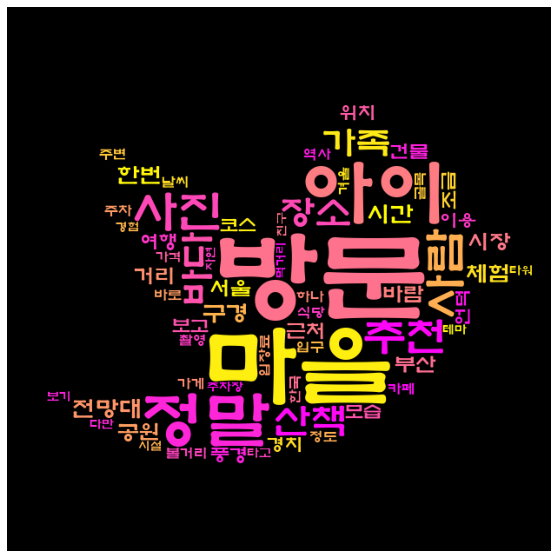

In [83]:
cloud=wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [84]:
wordcloud.to_file(filename="랜드마크WC.png")

#### 역사적인 장소만 추출해보기

In [85]:
a=df[df['카테고리']=='역사적인 장소']

In [86]:
okt=Okt() # 형태소 분석기
word_list=[]
word_list=a['전체내용']

In [87]:
sentences_tag=[]
for sentence in word_list:
    morph=okt.pos(sentence)
    sentences_tag.append(morph)

In [88]:
noun_list=[]
for sentence in sentences_tag:
    for word,tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [89]:
len(noun_list)

20200

In [90]:
noun_list=[n for n in noun_list if len(n) > 1]
noun_list[:100]

['대한민국',
 '역사',
 '대한민국',
 '역사',
 '서울',
 '방문',
 '방문',
 '경복궁',
 '우리',
 '역사',
 '경복궁',
 '산책',
 '행복',
 '국민',
 '공감',
 '장소',
 '경복궁',
 '국민',
 '자주',
 '작성자',
 '주말',
 '자주',
 '가족',
 '방문',
 '가족',
 '방문',
 '고궁',
 '공기',
 '역사',
 '체험',
 '힐링',
 '곳임',
 '산책',
 '경복궁',
 '날씨',
 '종종',
 '산책',
 '경복궁',
 '마음',
 '해지',
 '기분',
 '가을',
 '산책',
 '추천',
 '다음',
 '근처',
 '관광지',
 '거리',
 '자주',
 '이용',
 '가족',
 '위로',
 '방문',
 '요새',
 '더욱',
 '코로나',
 '사람',
 '방문',
 '자녀',
 '반시',
 '성인',
 '입장',
 '무료',
 '지금',
 '시기',
 '나들이',
 '지하철',
 '광화문역',
 '종각역',
 '이용',
 '편리',
 '하늘',
 '조선',
 '개국',
 '처음',
 '세운',
 '으뜸',
 '궁궐',
 '하늘',
 '경복궁',
 '가장',
 '웅장',
 '경복궁',
 '임진왜란',
 '일제강점기',
 '일본',
 '파괴',
 '당한',
 '악연',
 '향원정',
 '보수',
 '공사',
 '경회루',
 '경복궁',
 '한국',
 '건축물',
 '한복',
 '입장료',
 '무료',
 '주변']

In [91]:
counts=Counter(noun_list)
tags=counts.most_common(70)
tags

[('역사', 224),
 ('방문', 224),
 ('산책', 209),
 ('아이', 116),
 ('장소', 110),
 ('사람', 100),
 ('생각', 100),
 ('마을', 85),
 ('시간', 84),
 ('가족', 80),
 ('추천', 76),
 ('공원', 70),
 ('정도', 66),
 ('건물', 62),
 ('입장료', 61),
 ('주변', 61),
 ('정말', 61),
 ('구경', 61),
 ('모습', 59),
 ('서울', 57),
 ('근처', 56),
 ('유적지', 56),
 ('가면', 55),
 ('조금', 55),
 ('무덤', 54),
 ('체험', 53),
 ('박물관', 53),
 ('가을', 52),
 ('코스', 52),
 ('사진', 51),
 ('무료', 50),
 ('위치', 50),
 ('느낌', 50),
 ('주차장', 49),
 ('가장', 48),
 ('한번', 47),
 ('여행', 47),
 ('서원', 47),
 ('지금', 46),
 ('왕릉', 46),
 ('조선', 45),
 ('한국', 45),
 ('여름', 45),
 ('나들이', 44),
 ('의미', 44),
 ('입구', 42),
 ('매우', 40),
 ('풍경', 40),
 ('버스', 40),
 ('경치', 40),
 ('하나', 39),
 ('세계', 38),
 ('주차', 38),
 ('규모', 37),
 ('산성', 35),
 ('볼거리', 34),
 ('날씨', 33),
 ('마음', 33),
 ('보고', 33),
 ('관람', 33),
 ('그냥', 33),
 ('설명', 33),
 ('길이', 33),
 ('고분', 33),
 ('거리', 32),
 ('내부', 32),
 ('조선시대', 32),
 ('공간', 32),
 ('아주', 32),
 ('최고', 31)]

In [92]:
# 불필요한 단어 삭제
tags.remove(('정도', 66))
tags.remove(('근처', 56))
tags.remove(('가면', 55))
tags.remove(('가장', 48))
tags.remove(('한번', 47))
tags.remove(('의미', 44))
tags.remove(('매우', 40))
tags.remove(('하나', 39))
tags.remove(('그냥', 33))
tags.remove(('아주', 32))

In [93]:
from PIL import Image
image=Image.open('cloud_img.jpg')
mask=np.array(image)

In [94]:
## 워드 클라우드 생성
font_path='C:/Windows/Fonts/HMFMOLD.ttf'
from wordcloud import WordCloud
wordcloud=WordCloud(font_path=font_path,
                   background_color='Black',width=1200,height=800,colormap='spring',mask=mask)
print(dict(tags))

{'역사': 224, '방문': 224, '산책': 209, '아이': 116, '장소': 110, '사람': 100, '생각': 100, '마을': 85, '시간': 84, '가족': 80, '추천': 76, '공원': 70, '건물': 62, '입장료': 61, '주변': 61, '정말': 61, '구경': 61, '모습': 59, '서울': 57, '유적지': 56, '조금': 55, '무덤': 54, '체험': 53, '박물관': 53, '가을': 52, '코스': 52, '사진': 51, '무료': 50, '위치': 50, '느낌': 50, '주차장': 49, '여행': 47, '서원': 47, '지금': 46, '왕릉': 46, '조선': 45, '한국': 45, '여름': 45, '나들이': 44, '입구': 42, '풍경': 40, '버스': 40, '경치': 40, '세계': 38, '주차': 38, '규모': 37, '산성': 35, '볼거리': 34, '날씨': 33, '마음': 33, '보고': 33, '관람': 33, '설명': 33, '길이': 33, '고분': 33, '거리': 32, '내부': 32, '조선시대': 32, '공간': 32, '최고': 31}


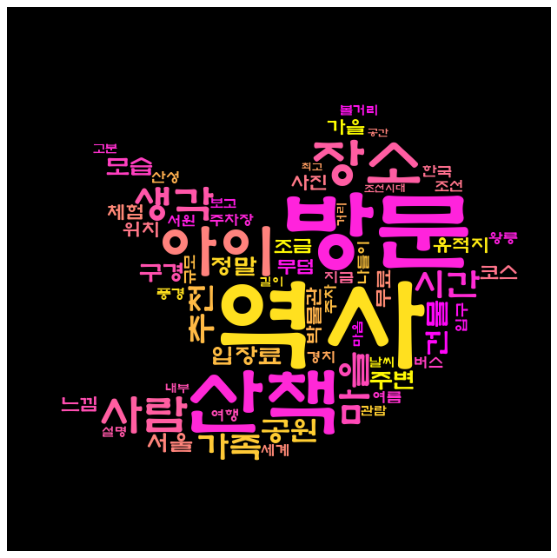

In [95]:
cloud=wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [96]:
wordcloud.to_file(filename="역사적인장소WC.png")

In [105]:
a=df[df['카테고리']=='자연 경관']

In [106]:
okt=Okt() # 형태소 분석기
word_list=[]
word_list=a['전체내용']

In [107]:
sentences_tag=[]
for sentence in word_list:
    morph=okt.pos(sentence)
    sentences_tag.append(morph)

In [108]:
noun_list=[]
for sentence in sentences_tag:
    for word,tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [109]:
len(noun_list)

9775

In [110]:
noun_list=[n for n in noun_list if len(n) > 1]
noun_list[:100]

['마지막',
 '이자',
 '할로윈데이',
 '서울숲',
 '서울숲',
 '대중교통',
 '지하철',
 '분당선',
 '서울숲',
 '호선',
 '뚝섬역',
 '여개',
 '시내버스',
 '이용',
 '가능',
 '이용',
 '공원',
 '접근',
 '용의',
 '테마',
 '부지',
 '공원',
 '사회',
 '거리',
 '두기',
 '비교',
 '때문',
 '종종',
 '서울숲',
 '관련',
 '시민기자',
 '뉴스',
 '보고',
 '방문',
 '가을',
 '단풍',
 '단풍',
 '정점',
 '예상',
 '건대',
 '더욱',
 '름답',
 '물든',
 '서울숲',
 '단풍',
 '초가',
 '이번',
 '서울숲',
 '방문',
 '할로윈데이',
 '다른',
 '달리',
 '외국인',
 '가족',
 '꼬마',
 '할로윈',
 '복장',
 '여느',
 '다른',
 '풍경',
 '할로윈',
 '복장',
 '마스크',
 '착용',
 '시민',
 '방법',
 '서울숲',
 '모습',
 '가을',
 '서울숲',
 '주말',
 '스케치',
 '마지막',
 '서울숲',
 '스케치',
 '강아지',
 '산책',
 '위치',
 '근처',
 '레스토랑',
 '산책',
 '힐링',
 '최고',
 '공원',
 '자전거',
 '대여',
 '자전거',
 '타고',
 '서울숲',
 '뚝섬역',
 '공원',
 '산책',
 '멀리',
 '사슴',
 '만날',
 '현재',
 '코로나',
 '상태',
 '산책',
 '강아지']

In [111]:
counts=Counter(noun_list)
tags=counts.most_common(70)
tags

[('산책', 115),
 ('방문', 97),
 ('동굴', 68),
 ('폭포', 67),
 ('사진', 65),
 ('계곡', 65),
 ('코스', 56),
 ('공원', 55),
 ('여름', 54),
 ('생각', 52),
 ('정말', 52),
 ('가족', 50),
 ('추천', 48),
 ('사람', 47),
 ('아이', 46),
 ('풍경', 43),
 ('바다', 43),
 ('가을', 42),
 ('경치', 40),
 ('입장료', 39),
 ('주변', 38),
 ('자연', 37),
 ('타고', 36),
 ('시간', 36),
 ('여행', 36),
 ('물이', 35),
 ('정도', 33),
 ('자전거', 32),
 ('겨울', 32),
 ('나무', 32),
 ('길이', 31),
 ('근처', 29),
 ('최고', 29),
 ('느낌', 29),
 ('바람', 29),
 ('조금', 29),
 ('보고', 28),
 ('주차장', 28),
 ('구경', 28),
 ('위치', 27),
 ('한번', 26),
 ('수목원', 26),
 ('찍기', 25),
 ('장소', 25),
 ('아주', 25),
 ('주차', 25),
 ('가면', 24),
 ('입구', 24),
 ('선암사', 24),
 ('모습', 23),
 ('호수', 23),
 ('걷기', 22),
 ('산책로', 22),
 ('중간', 21),
 ('날씨', 20),
 ('단풍', 19),
 ('다른', 19),
 ('그냥', 19),
 ('기분', 19),
 ('힐링', 18),
 ('규모', 18),
 ('다시', 18),
 ('하나', 18),
 ('바로', 18),
 ('매우', 18),
 ('발원', 18),
 ('조성', 17),
 ('공기', 17),
 ('시설', 17),
 ('바위', 17)]

In [115]:
# 불필요한 단어 삭제 
tags.remove(('타고', 36))
tags.remove(('물이', 35))
tags.remove(('느낌', 29))
tags.remove(('최고', 29))
tags.remove(('근처', 29))
tags.remove(('아주', 25))
tags.remove(('중간', 21))
tags.remove(('하나', 18))
tags.remove(('매우', 18))

ValueError: list.remove(x): x not in list

In [116]:
from PIL import Image
image=Image.open('cloud_img.jpg')
mask=np.array(image)


In [117]:
## 워드 클라우드 생성
font_path='C:/Windows/Fonts/HMFMOLD.ttf'
from wordcloud import WordCloud
wordcloud=WordCloud(font_path=font_path,
                   background_color='Black',width=1200,height=800,colormap='spring',mask=mask)
print(dict(tags))


{'산책': 115, '방문': 97, '동굴': 68, '폭포': 67, '사진': 65, '계곡': 65, '코스': 56, '공원': 55, '여름': 54, '생각': 52, '정말': 52, '가족': 50, '추천': 48, '사람': 47, '아이': 46, '풍경': 43, '바다': 43, '가을': 42, '경치': 40, '입장료': 39, '주변': 38, '자연': 37, '시간': 36, '여행': 36, '정도': 33, '자전거': 32, '겨울': 32, '나무': 32, '길이': 31, '근처': 29, '최고': 29, '느낌': 29, '바람': 29, '보고': 28, '주차장': 28, '구경': 28, '위치': 27, '수목원': 26, '찍기': 25, '장소': 25, '아주': 25, '주차': 25, '가면': 24, '입구': 24, '선암사': 24, '모습': 23, '호수': 23, '걷기': 22, '산책로': 22, '중간': 21, '날씨': 20, '단풍': 19, '다른': 19, '그냥': 19, '기분': 19, '힐링': 18, '규모': 18, '다시': 18, '하나': 18, '바로': 18, '매우': 18, '발원': 18, '조성': 17, '공기': 17, '시설': 17, '바위': 17}


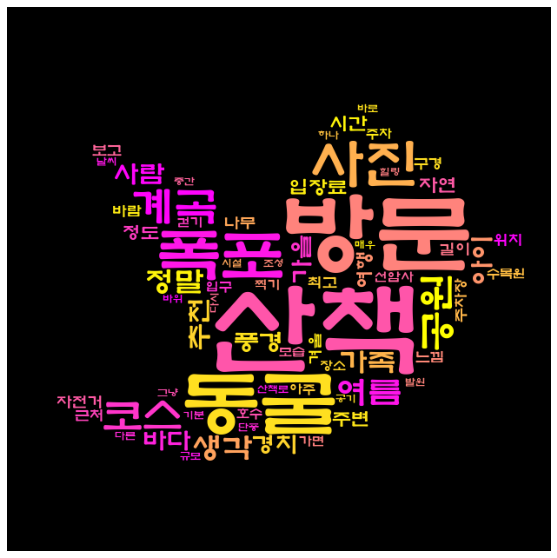

In [118]:
cloud=wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [119]:
wordcloud.to_file(filename="자연경관WC.png")